In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split,KFold,RandomizedSearchCV
from sklearn import metrics,svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import lightgbm as lgb
from matplotlib.pyplot import figure
import os
os.getcwd()
os.chdir('/Users/haochunniu/Desktop/Kaggle Compatition/Spotify Hit Prediction/Raw Data')

## Problem Statement  
Music has a always played an important role in people's daily life. In addition, as mobile and app technology thrive, more and more artists rely heavily on music streaming platforms, such as Spotify. As a music lover, I am really curious about nowadays music listeners' taste and preference. Hence, I create a prediction model that could accurately predict whether the track is going to be a hit track based on various musical characteristic, using the Spotify dataset from Kaggle. (https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset)

## 1. Import Data   
In the original raw data, we have data about Spotify hit tracks from 1960-2010. Yet, based on my observation, the music preference has changed dramatically in the past few decades. Hence, in this project, I use only the data from the **past 20 years (2000-2019)**.    
The detailed data description about each column could be find in the below URL from Kaggle.   
https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset
   
   
Within the Spotify dataset for **2010-2019**, there are **6398 tracks and rows of data also with 19 columns**.   
Within the Spotify dataset for **2000-2009**, there are **5872 tracks and rows of data also with 19 columns**.


In [2]:
data_2000=pd.read_csv('dataset-of-00s.csv')
data_2010=pd.read_csv('dataset-of-10s.csv')

In [3]:
data_2000.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
data_2010.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [23]:
#Merge the two data frame
raw=pd.concat([data_2000,data_2010],ignore_index=True)
raw.shape

(12270, 19)

## 2. Data preprocessing

### a. Missing value inspection   
For the raw dataset, there's no NA values within the dataset.

In [24]:
raw.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

### b. Data type inspection  
In the original data set, the key and mode columns which are categorical variable are mis-treated as numeric variables.   
Hence, I need to convert them back to categorical variables.

In [25]:
## Key column should be categorical
raw['key']=raw['key'].astype('str')

In [26]:
raw = pd.get_dummies(raw,
                     prefix='key',
                     prefix_sep='-', 
                     columns=['key'])

In [27]:
## Mode column should be categorical
raw['mode']=raw['mode'].astype('str')

In [28]:
raw = pd.get_dummies(raw,
                     prefix='mode',
                     prefix_sep='-', 
                     columns=['mode'])

### c. Drop unuseful columns

In [29]:
raw=raw.drop(columns=['track','uri','artist'])
raw.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target', 'key-0', 'key-1',
       'key-10', 'key-11', 'key-2', 'key-3', 'key-4', 'key-5', 'key-6',
       'key-7', 'key-8', 'key-9', 'mode-0', 'mode-1'],
      dtype='object')

### d. Imbalance data inspection   
Given that this project is a binary classification problem, to ensure model performance, I need to be aware of the imbalance data issue. In this project, the binary target variable does not suffer from the imbalance data issue. Each class is account for 50% of the data.

In [30]:
raw['target'].value_counts()

1    6135
0    6135
Name: target, dtype: int64

### e. Train test split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(raw.loc[:,raw.columns!='target'],raw['target'],test_size=0.2,random_state=9)

## 3. EDA & Data Vizualization  
In this project, all data vizualizations are completed on Tableau, and all plots will be published to my Tableau Public. The URL is attached below. Feel free to take a look at it.
Tableau Public URL: https://public.tableau.com/app/profile/hao.chun.niu/viz/SpotifyHitTrackEDA/Dashboard1

## 4. Nested Random Search to find the best models

In [67]:
# 1. Create the Classifier
rf=RandomForestClassifier(random_state=9)
xgb=XGBClassifier(seed=9,objective='binary:logistic',use_label_encoder =False,verbosity = 0)
lgbm=lgb.LGBMClassifier(objective='binary',random_state=9)

##############################################################
# 2. Create the parameter grid
rf_grid={'n_estimators':list(range(100,1100,100)),
         'max_depth':list(range(3,11))}
xgb_grid={'eta':np.arange(0.1,0.6,0.1),
          'max_depth':list(range(3,16)),
          'n_estimators':list(range(10,310,10)),
          'gamma':list(range(1,6))}
lgbm_grid={'learning_rate':np.arange(0.1,0.6,0.1),
           'max_depth':list(range(3,16)),
           'n_estimators':list(range(10,310,10))}

##############################################################
# 3. Create the CV
inner_cv = KFold(n_splits=3, shuffle=True, random_state=9)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=9)

##############################################################
# 4-1-1. Random-search CV for Random Forest
clf = RandomizedSearchCV(rf,rf_grid,cv=inner_cv,scoring='accuracy',n_iter=15,random_state=9)

# 4-1-2. Nested CV for Random Forest
nested_score = cross_val_score(clf,X=x_train, y=y_train, cv=outer_cv,scoring='accuracy')

# 4-1-3. Result for Nested CV
rf_result=nested_score.mean()

##############################################################
# 4-2-1. Random-search CV for XGBoost Classifier
clf = RandomizedSearchCV(xgb,xgb_grid,cv=inner_cv,scoring='accuracy',n_iter=15,random_state=9)

# 4-2-2. Nested CV for XGBoost Classifier
nested_score = cross_val_score(clf,X=x_train, y=y_train, cv=outer_cv,scoring='accuracy')

# 4-2-3. Result for Nested CV
xgb_result=nested_score.mean()

##############################################################
# 4-3-1. Random-search CV for LightGBM Classifier
clf = RandomizedSearchCV(lgbm,lgbm_grid,cv=inner_cv,scoring='accuracy',n_iter=15,random_state=9)

# 4-3-2. Nested CV for LightGBM Classifier
nested_score = cross_val_score(clf,X=x_train, y=y_train, cv=outer_cv,scoring='accuracy')

# 4-3-3. Result for Nested CV
lgbm_result=nested_score.mean()

In [68]:
print('Average Performance of Random Forest Classifier: {}%'.format(round(rf_result*100,2)))
print('Average Performance of XGBoost Classifier: {}%'.format(round(xgb_result*100,2)))
print('Average Performance of LightGBM Classifier: {}%'.format(round(lgbm_result*100,2)))

Average Performance of Random Forest Classifier: 84.17%
Average Performance of XGBoost Classifier: 85.13%
Average Performance of LightGBM Classifier: 84.86%


## 5. Random Search on XGBoost Classifier to find the best parameter combination

In [69]:
# 1. Create estimator
xgb=XGBClassifier(seed=9,objective='binary:logistic',use_label_encoder =False,verbosity = 0)

# 2. Create parameter grid
xgb_grid={'eta':np.arange(0.1,0.6,0.1),
          'max_depth':list(range(3,16)),
          'n_estimators':list(range(10,310,10)),
          'gamma':list(range(1,6))}

# 3. Grid-search
model = RandomizedSearchCV(xgb,xgb_grid,cv=5,scoring='accuracy',n_iter=15,random_state=9)

# 4. Fit the model
model.fit(x_train,y_train)

# 5. Predict
y_pred=model.predict(x_test)


In [70]:
# 6. Result
print ("With CV random search, I found the best hyperparameter is eta={}, max_depth={}, n_estimators={}, and gamma={}.".format(model.best_params_['eta'],
                                                                                                                               model.best_params_['max_depth'],
                                                                                                                               model.best_params_['n_estimators'],
                                                                                                                               model.best_params_['gamma']))
print("Prediction Accuracy Score on Test Data: {}%".format(round(metrics.accuracy_score(y_test,y_pred)*100,2)))
print('----------------------------------------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

With CV random search, I found the best hyperparameter is eta=0.1, max_depth=6, n_estimators=220, and gamma=2.
Prediction Accuracy Score on Test Data: 82.93%
----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1275
           1       0.79      0.88      0.83      1179

    accuracy                           0.83      2454
   macro avg       0.83      0.83      0.83      2454
weighted avg       0.83      0.83      0.83      2454



## 6. Feature Importance  

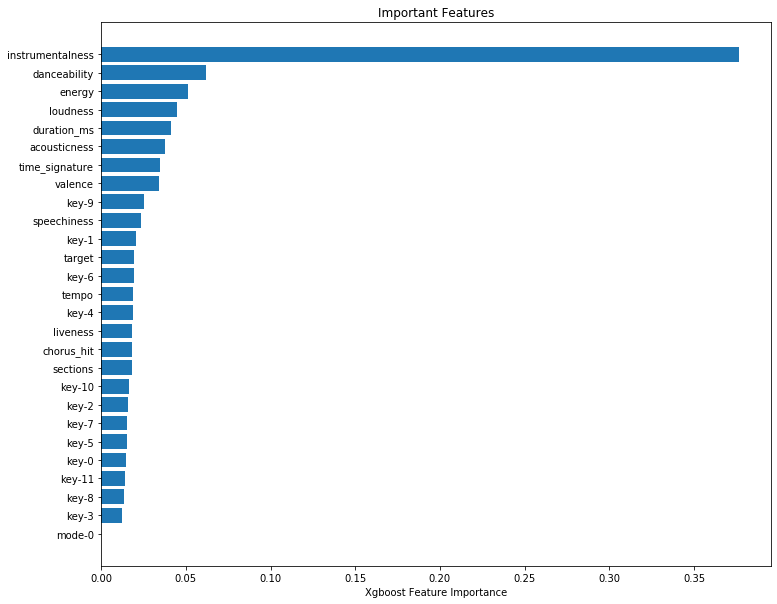

In [71]:
figure(figsize=(12, 10))
sorted_idx = model.best_estimator_.feature_importances_.argsort()
plt.barh(raw.columns[sorted_idx], model.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Important Features")
plt.show()

## Summary  
Based on the feature importance plot, I notice that instrumentalness and danceability are the two most important features, and I believe this result is reasonable. In the past few years, as party culture and K-pop culture go viral, all kinds of electric and party songs become more and more popular. In conclusion, based on the analysis result, electric party and pop styles are more align with nowadays music listeners' taste.